In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_dir = '/content/drive/MyDrive/data_distribution_for_SVM'

In [ ]:
#os.listdir(data_dir)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [ ]:
os.listdir(train_path+'0')[0]

'5cee9695-d638-4b7c-8dbc-220ddce9de26.JPG'

In [ ]:
imgPath = train_path+'0/'+'007cb8ca-b40c-46a2-9b7b-19f5b43b0e78.JPG'
imgPath

'/content/drive/MyDrive/data_distribution_for_SVM/train/0/007cb8ca-b40c-46a2-9b7b-19f5b43b0e78.JPG'

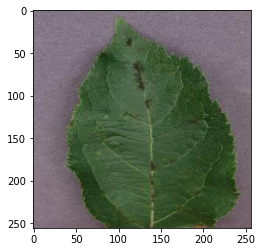

In [ ]:
plt.imshow(imread(imgPath))

In [ ]:
len(os.listdir(train_path+'0'))

111

In [ ]:
len(os.listdir(test_path+'0'))

110

In [ ]:
dim1 = []
dim2 = []
for img_filename in os.listdir(test_path+'0'):
    img = imread(test_path+'0/'+img_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


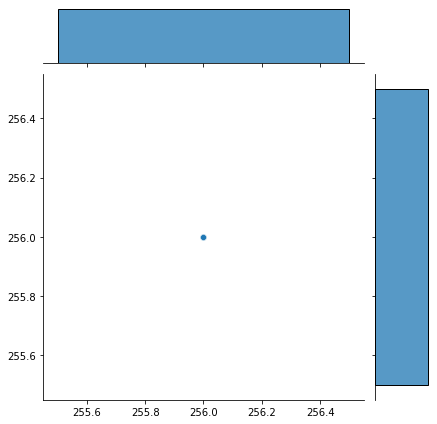

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

256.0

In [ ]:
np.mean(dim2)

256.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             rescale=1/255, 
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

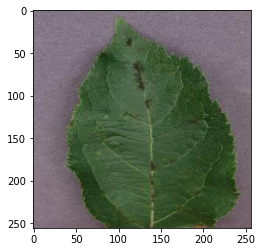

In [ ]:
image = imread(imgPath)
plt.imshow(image)

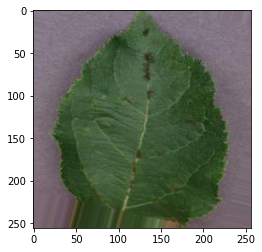

In [ ]:
plt.imshow(img_gen.random_transform(image))

In [ ]:
img_gen.flow_from_directory(train_path)

Found 8751 images belonging to 38 classes.


In [ ]:
img_gen.flow_from_directory(test_path)

Found 10547 images belonging to 38 classes.


In [ ]:
model = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='max',
    classes=38,
    classifier_activation="softmax",
)

In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

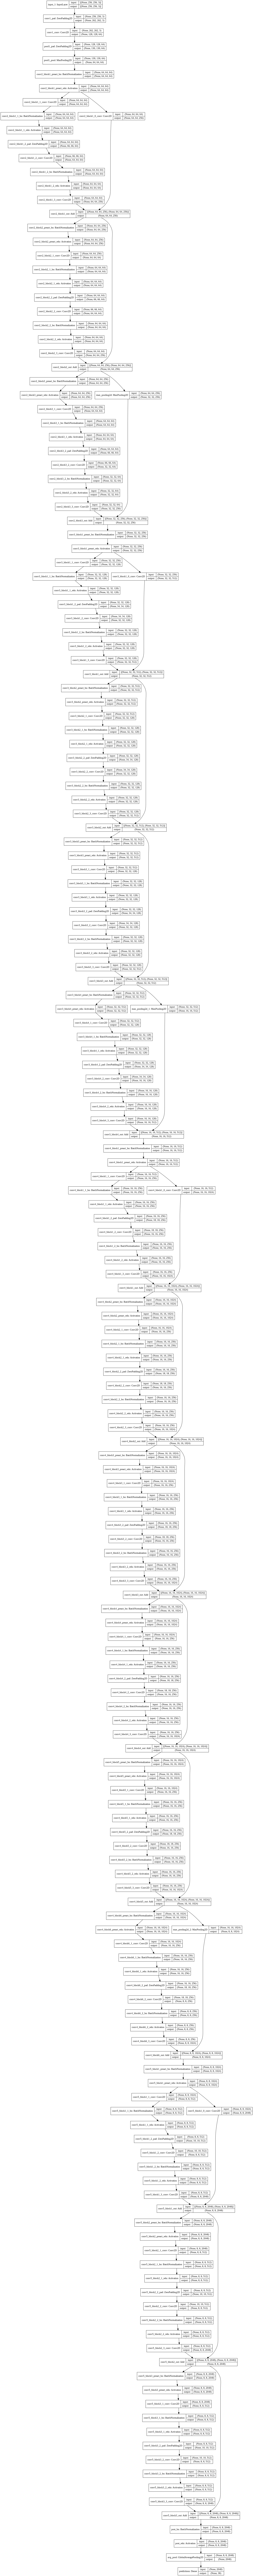

In [ ]:
from keras.applications.resnet50 import ResNet50

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size = 32
train_img_gen = img_gen.flow_from_directory(train_path, 
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 8751 images belonging to 38 classes.


In [ ]:
test_img_gen = img_gen.flow_from_directory(test_path, 
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            class_mode='categorical')

Found 10547 images belonging to 38 classes.


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [ ]:
restults = model.fit(train_img_gen,
                    epochs=20,
                    batch_size=32,
                    validation_data=test_img_gen,
                    callbacks=[early_stop]
)

Epoch 1/20
274/274 [==============================] - ETA: 0s - loss: 1.8516 - accuracy: 0.4877 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(test_img_gen)
predictions = np.argmax(predictions,axis=1)
print(classification_report(test_img_gen.classes, predictions))

In [ ]:
pred = model.predict_generator(test_img_gen)
matrics = pd.DataFrame(restults.history)

In [ ]:
matrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
matrics[['loss', 'val_loss']].plot()